In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
df=pd.read_csv('Housing_Data.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# univariate analysis

<AxesSubplot:xlabel='Price', ylabel='Count'>

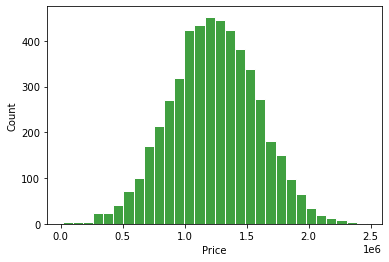

In [8]:
sns.histplot(df.Price, color='g', edgecolor='w', bins=30)

The prices is evenly distributed.

## Bivariate Analysis

C:\Users\petergg4me\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


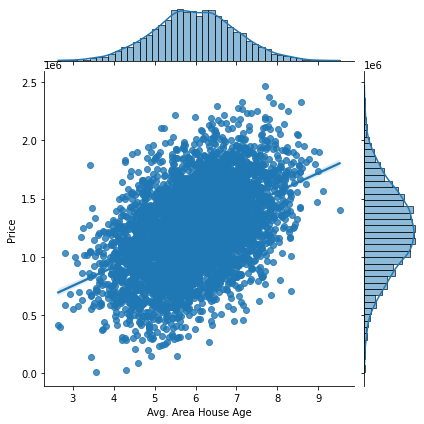

In [9]:
sns.jointplot(df['Avg. Area House Age'], df['Price'], kind='reg')

The relationship betweent the price and the Avg. Area House age is linear.
there for those with high avg. area house age tend to have high prices. 

## Multivibrate Analysis

In [10]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

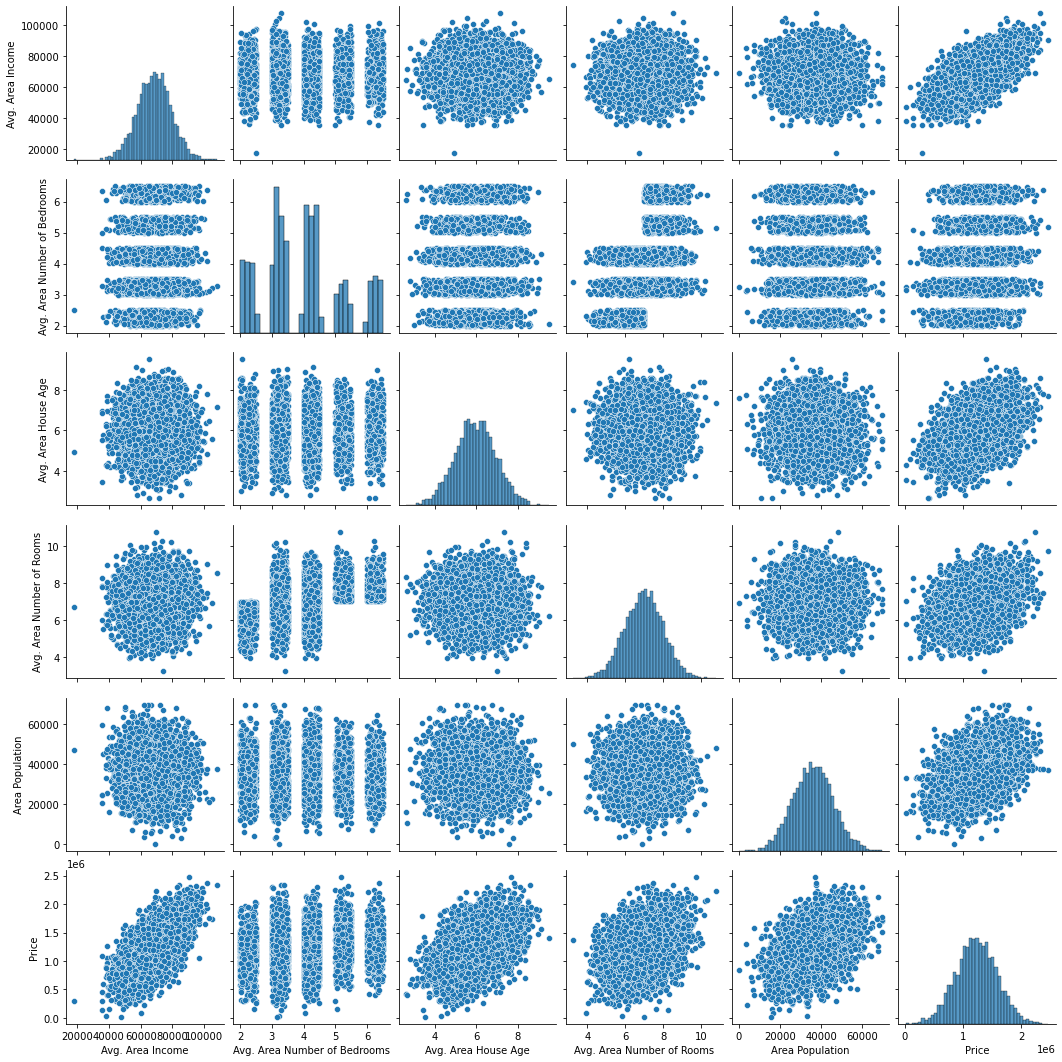

In [11]:
sns.pairplot(df[['Avg. Area Income','Avg. Area Number of Bedrooms','Avg. Area House Age','Avg. Area Number of Rooms','Area Population','Price']])

the nice relationship between average area income and the price and the relationship is linear. also the chart has some well organized relatioship between each other 

In [12]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:>

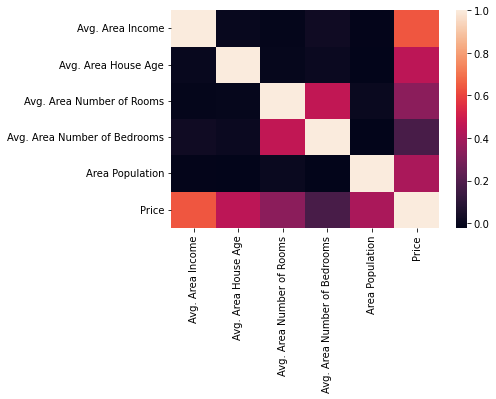

In [13]:
sns.heatmap(df.corr(),)


The correlation between price and average area income is strongly positve. 

In [14]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [15]:
# creating x-array
x=df[['Avg. Area Income','Avg. Area Number of Bedrooms','Avg. Area House Age','Avg. Area Number of Rooms','Area Population']]

In [16]:
# y array will be the target variable 
y=df['Price']

In [17]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=0)

In [18]:
reg=LinearRegression()

In [19]:
reg.fit(x_train,y_train)

LinearRegression()

In [20]:
print(reg.intercept_)
print(reg.coef_)

-2644788.9773771213
[2.16187374e+01 1.76003780e+03 1.66145180e+05 1.21010577e+05
 1.51647974e+01]


In [21]:
y_pred=reg.predict(x_test)
y_pred

array([ 969608.34680626,  953868.15548654,  907506.32836107, ...,
       1423701.02109721,  744400.93315398,  488525.83117551])

In [27]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [31]:
score=r2_score(y_pred, y_test)

In [32]:
mae=mean_absolute_error(y_pred,y_test)
mse=mean_squared_error(y_pred, y_test)
rmse=np.sqrt(mse)

In [34]:
print(mae)
print(mse)
print(rmse)
print(score)

81563.14733994266
10337337828.267555
101672.69952286874
0.9139913479405822


In [35]:
df2=pd.DataFrame({'Actual Price':y_test, 'Predicted Price': y_pred})
df2

,Actual Price,Predicted Price
398,8.942511e+05,9.696083e+05
3833,9.329794e+05,9.538682e+05
4836,9.207479e+05,9.075063e+05
4572,6.918549e+05,4.933253e+05
636,7.327332e+05,7.182212e+05
...,...,...
4554,1.900789e+06,1.708751e+06
4807,1.630435e+06,1.585405e+06
1073,1.372994e+06,1.423701e+06
2906,7.707706e+05,7.444009e+05
